In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error

In [2]:
df = pd.read_csv("city_day.csv")

In [3]:
df["Date"] = pd.to_datetime(df['Date'], format='%Y-%m-%d')
df = df.set_index('Date')

In [4]:
df.head(), df.shape

(                 City  PM2.5  PM10     NO    NO2    NOx  NH3     CO    SO2  \
 Date                                                                         
 2015-01-01  Ahmedabad    NaN   NaN   0.92  18.22  17.15  NaN   0.92  27.64   
 2015-01-02  Ahmedabad    NaN   NaN   0.97  15.69  16.46  NaN   0.97  24.55   
 2015-01-03  Ahmedabad    NaN   NaN  17.40  19.30  29.70  NaN  17.40  29.07   
 2015-01-04  Ahmedabad    NaN   NaN   1.70  18.48  17.97  NaN   1.70  18.59   
 2015-01-05  Ahmedabad    NaN   NaN  22.10  21.42  37.76  NaN  22.10  39.33   
 
                 O3  Benzene  Toluene  Xylene  AQI AQI_Bucket  
 Date                                                          
 2015-01-01  133.36     0.00     0.02    0.00  NaN        NaN  
 2015-01-02   34.06     3.68     5.50    3.77  NaN        NaN  
 2015-01-03   30.70     6.80    16.40    2.25  NaN        NaN  
 2015-01-04   36.08     4.43    10.14    1.00  NaN        NaN  
 2015-01-05   39.31     7.01    18.89    2.78  NaN        NaN

In [5]:
df = df[df["City"] == "Delhi"]
df.head(), df.tail(), df.shape

(             City   PM2.5    PM10     NO    NO2     NOx     NH3     CO   SO2  \
 Date                                                                           
 2015-01-01  Delhi  313.22  607.98  69.16  36.39  110.59   33.85  15.20  9.25   
 2015-01-02  Delhi  186.18  269.55  62.09  32.87   88.14   31.83   9.54  6.65   
 2015-01-03  Delhi   87.18  131.90  25.73  30.31   47.95   69.55  10.61  2.65   
 2015-01-04  Delhi  151.84  241.84  25.01  36.91   48.62  130.36  11.54  4.63   
 2015-01-05  Delhi  146.60  219.13  14.01  34.92   38.25  122.88   9.20  3.33   
 
                O3  Benzene  Toluene  Xylene    AQI AQI_Bucket  
 Date                                                           
 2015-01-01  41.68    14.36    24.86    9.84  472.0     Severe  
 2015-01-02  29.97    10.55    20.09    4.29  454.0     Severe  
 2015-01-03  19.71     3.91    10.23    1.99  143.0   Moderate  
 2015-01-04  25.36     4.26     9.71    3.34  319.0  Very Poor  
 2015-01-05  23.20     2.80     6.21    2

In [6]:
df.isnull().sum() / len(df)

City          0.000000
PM2.5         0.000996
PM10          0.038328
NO            0.000996
NO2           0.000996
NOx           0.000000
NH3           0.004480
CO            0.000000
SO2           0.054754
O3            0.041812
Benzene       0.000000
Toluene       0.000000
Xylene        0.388751
AQI           0.004978
AQI_Bucket    0.004978
dtype: float64

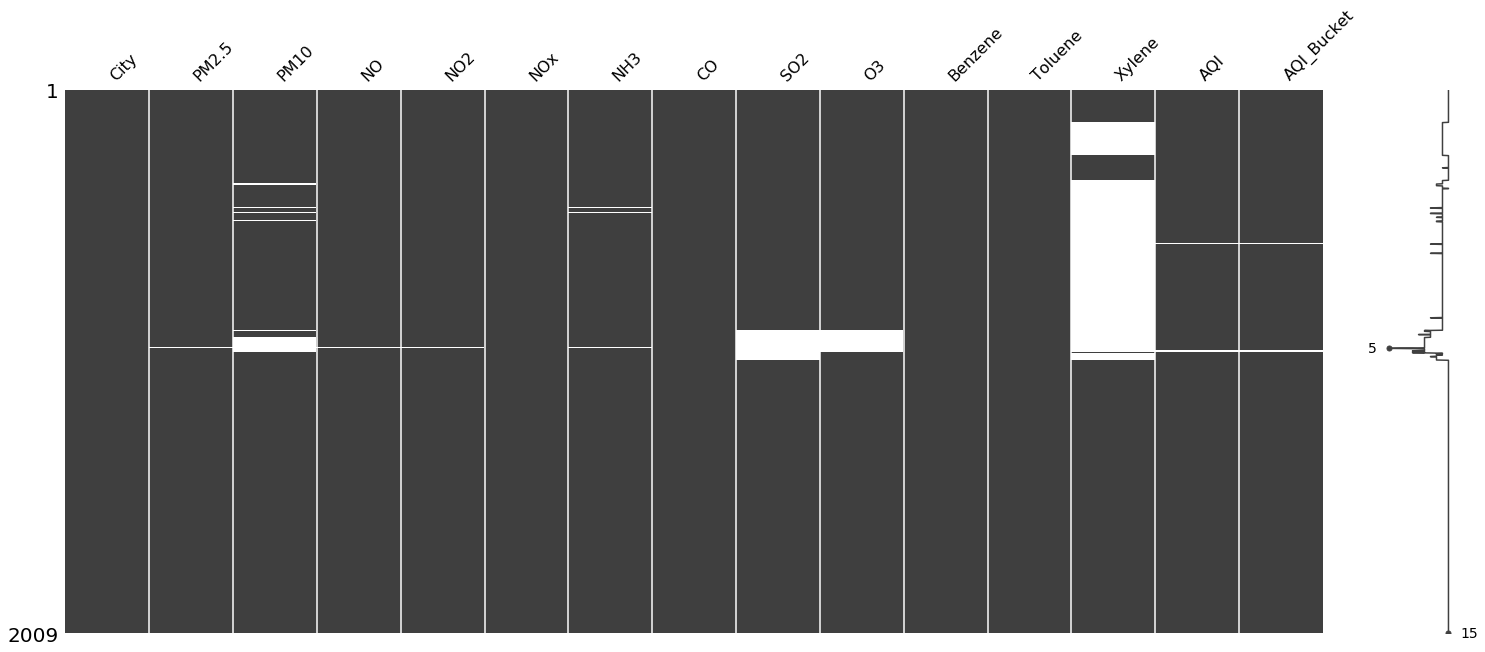

In [7]:
msno.matrix(df)

In [8]:
df = df.drop(columns=["City", "PM10", "SO2", "O3", "Xylene"])

In [9]:
df = df.fillna(method='ffill')

In [10]:
df.describe()

,PM2.5,NO,NO2,NOx,NH3,CO,Benzene,Toluene,AQI
count,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000,2009.000000
mean,117.101215,38.971533,50.769856,58.567023,41.957636,1.976053,3.544480,17.185042,258.632653
std,82.926225,33.375798,22.690612,37.690350,17.286741,2.560253,2.431232,15.291597,119.883918
min,10.240000,3.570000,10.630000,0.000000,6.780000,0.000000,0.000000,0.000000,29.000000
25%,57.080000,15.900000,33.900000,31.150000,31.110000,0.910000,1.870000,6.650000,159.000000
50%,94.490000,27.200000,47.020000,52.750000,38.010000,1.240000,2.960000,12.750000,257.000000
75%,152.990000,50.720000,63.570000,75.360000,48.680000,1.870000,4.680000,23.200000,345.000000
max,685.360000,221.030000,162.500000,254.800000,166.700000,30.440000,20.640000,103.000000,716.000000


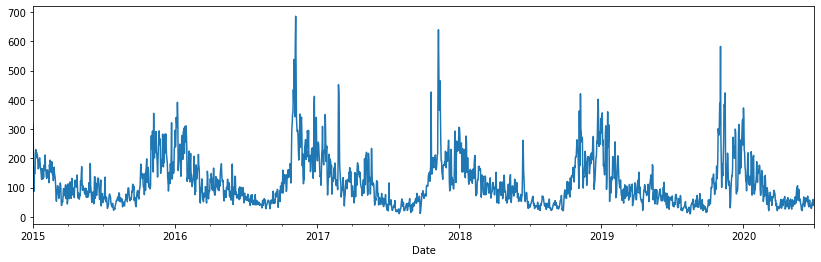

In [11]:
df["PM2.5"].plot(figsize=(14, 4))

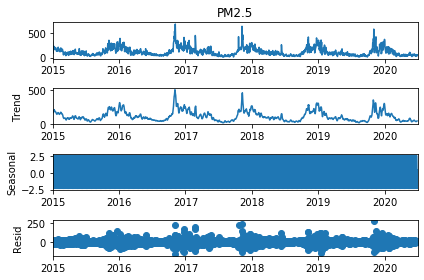

In [12]:
decomposition = seasonal_decompose(df['PM2.5'])
decomposition.plot()
plt.show()

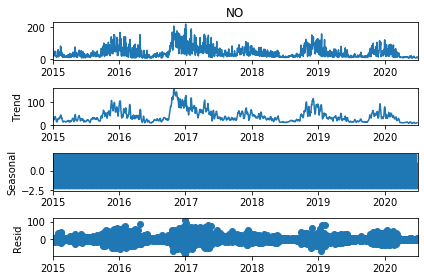

In [13]:
decomposition = seasonal_decompose(df['NO'])
decomposition.plot()
plt.show()

In [14]:
df_weekly = df.resample('W').mean()

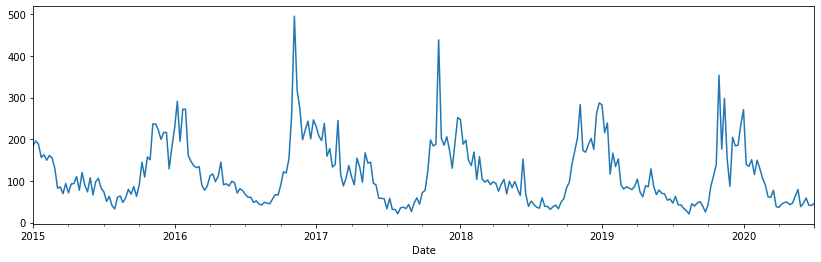

In [15]:
df_weekly["PM2.5"].plot(figsize=(14, 4))

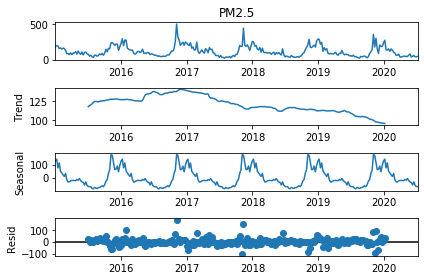

In [16]:
decomposition = seasonal_decompose(df_weekly['PM2.5'])
decomposition.plot()
plt.show()

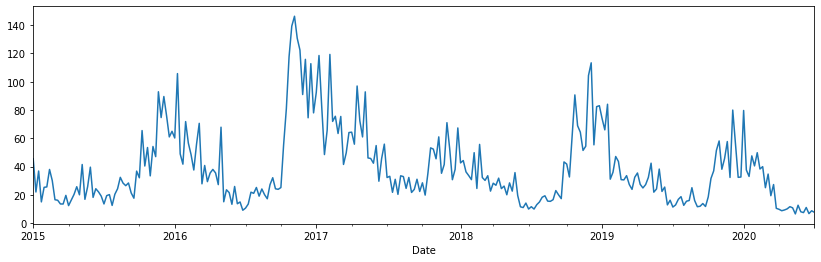

In [17]:
df_weekly["NO"].plot(figsize=(14, 4))

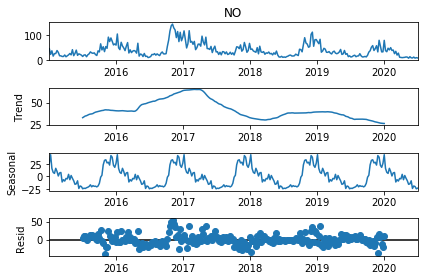

In [18]:
decomposition = seasonal_decompose(df_weekly['NO'])
decomposition.plot()
plt.show()

In [19]:
#NO2 	NOx 	NH3 	CO 	Benzene 	Toluene 	AQI

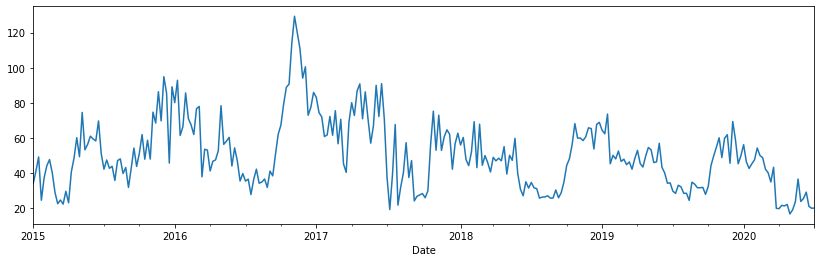

In [20]:
df_weekly["NO2"].plot(figsize=(14, 4))

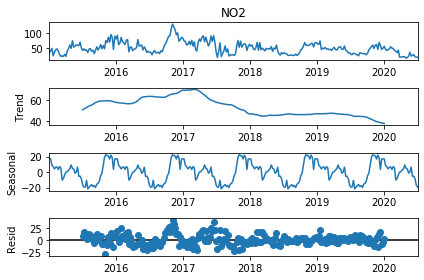

In [21]:
decomposition = seasonal_decompose(df_weekly['NO2'])
decomposition.plot()
plt.show()

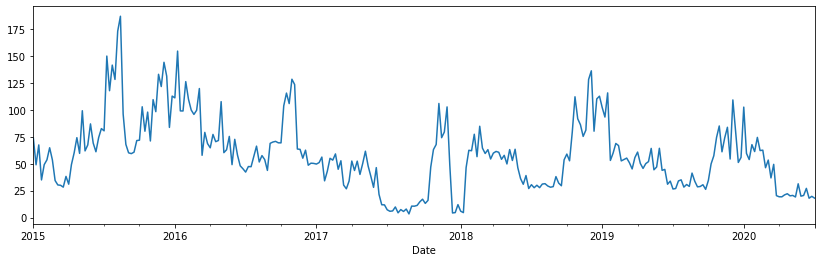

In [22]:
df_weekly["NOx"].plot(figsize=(14, 4))

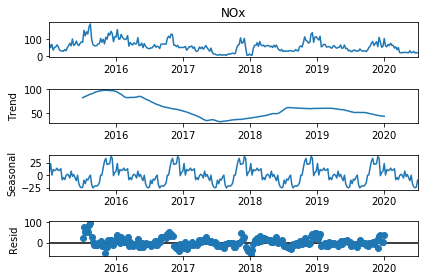

In [23]:
decomposition = seasonal_decompose(df_weekly['NOx'])
decomposition.plot()
plt.show()

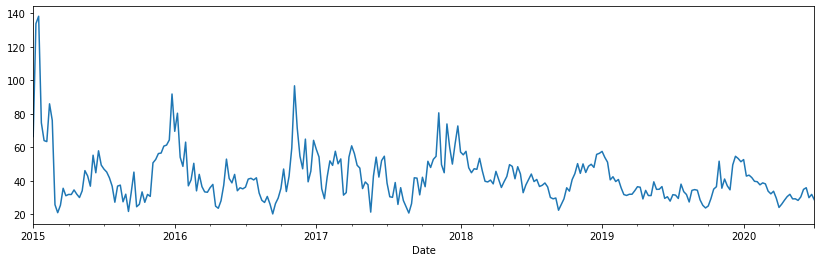

In [24]:
df_weekly["NH3"].plot(figsize=(14, 4))

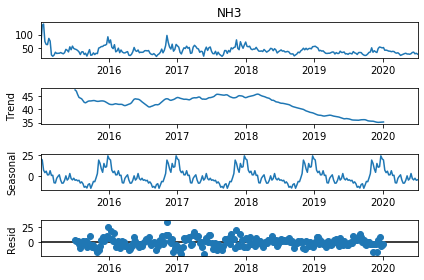

In [25]:
decomposition = seasonal_decompose(df_weekly['NH3'])
decomposition.plot()
plt.show()

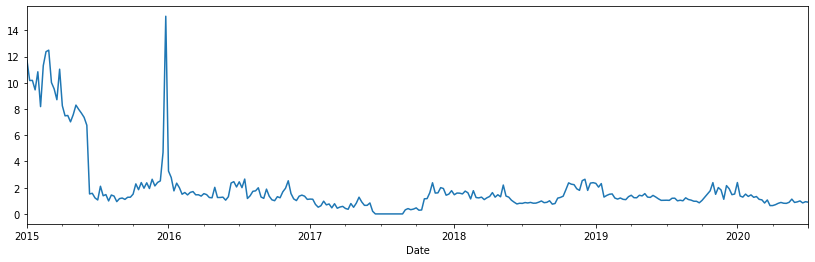

In [26]:
df_weekly["CO"].plot(figsize=(14, 4))

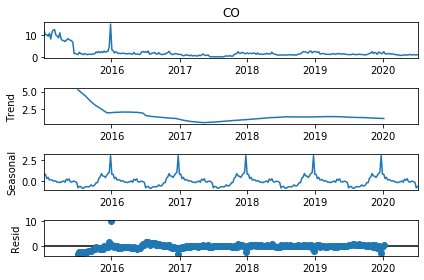

In [27]:
decomposition = seasonal_decompose(df_weekly['CO'])
decomposition.plot()
plt.show()

In [28]:
#Benzene 	Toluene 	AQI

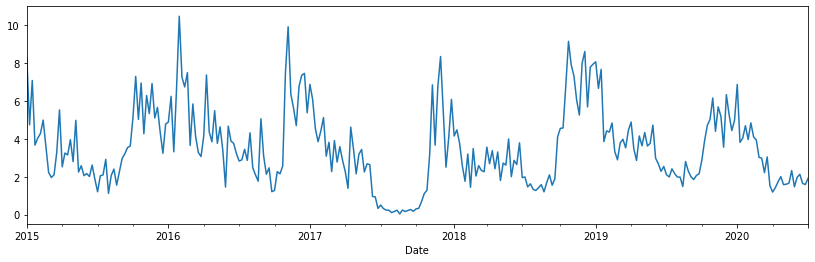

In [29]:
df_weekly["Benzene"].plot(figsize=(14, 4))

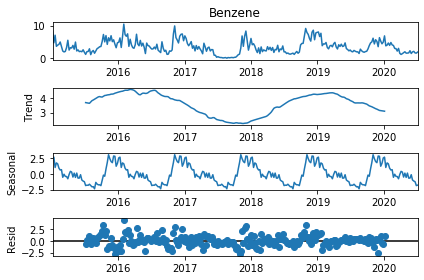

In [30]:
decomposition = seasonal_decompose(df_weekly['Benzene'])
decomposition.plot()
plt.show()

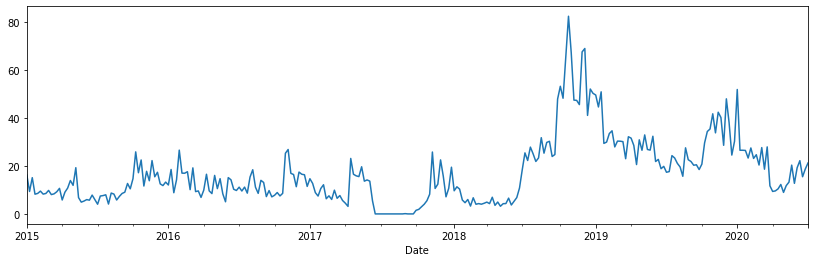

In [31]:
df_weekly["Toluene"].plot(figsize=(14, 4))

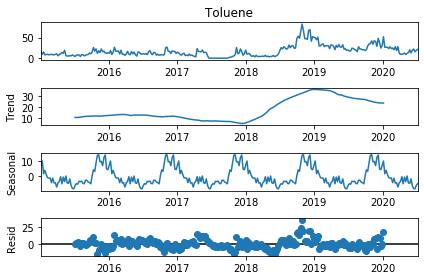

In [32]:
decomposition = seasonal_decompose(df_weekly['Toluene'])
decomposition.plot()
plt.show()

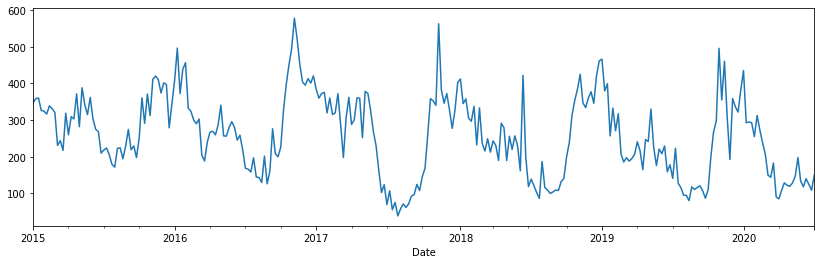

In [33]:
df_weekly["AQI"].plot(figsize=(14, 4))

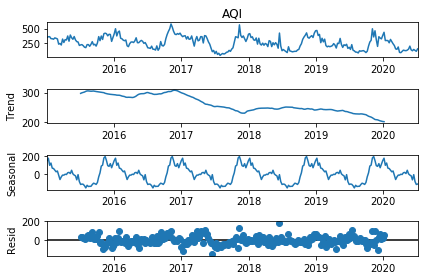

In [34]:
decomposition = seasonal_decompose(df_weekly['AQI'])
decomposition.plot()
plt.show()